In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from nsimpkg.random_variables import NormalRV, MixNormalRV
from nsimpkg.gaussian_OAIS import Adam_OAIS
from nsimpkg.mcsim import mcsim, rho
from nsimpkg.plotting import plot_contours, plotter, fill_z
np.random.seed(0)


plt.rcParams['figure.dpi'] = 300

q = NormalRV(np.array([10, -10]), np.array([[40, 0], [0, 40]]))
pi = NormalRV(np.array([1, -1]), np.array([[2, -0.5], [-0.5, 2]]))
GT = 0.195595

def phi(x):
    return (np.sum(np.abs(x) < 1, axis=0) == 2).astype(int)

N = 100
Niter = int(1e4)
alpha_Adam = 1e-2
nexperiments = 100
results_array_Adam = []
distribution_array_Adam = []
for _ in range(nexperiments):
    r_Adam, d_Adam = Adam_OAIS(phi, pi, q, N, Niter, alpha=alpha_Adam)
    results_array_Adam.append(r_Adam)
    distribution_array_Adam.append(d_Adam)


100%|██████████| 10000/10000 [00:12<00:00, 770.18it/s]


In [2]:
import nsimpkg.plotting
# import reload function from importlib
from importlib import reload
reload(nsimpkg.plotting)
from nsimpkg.plotting import plotter

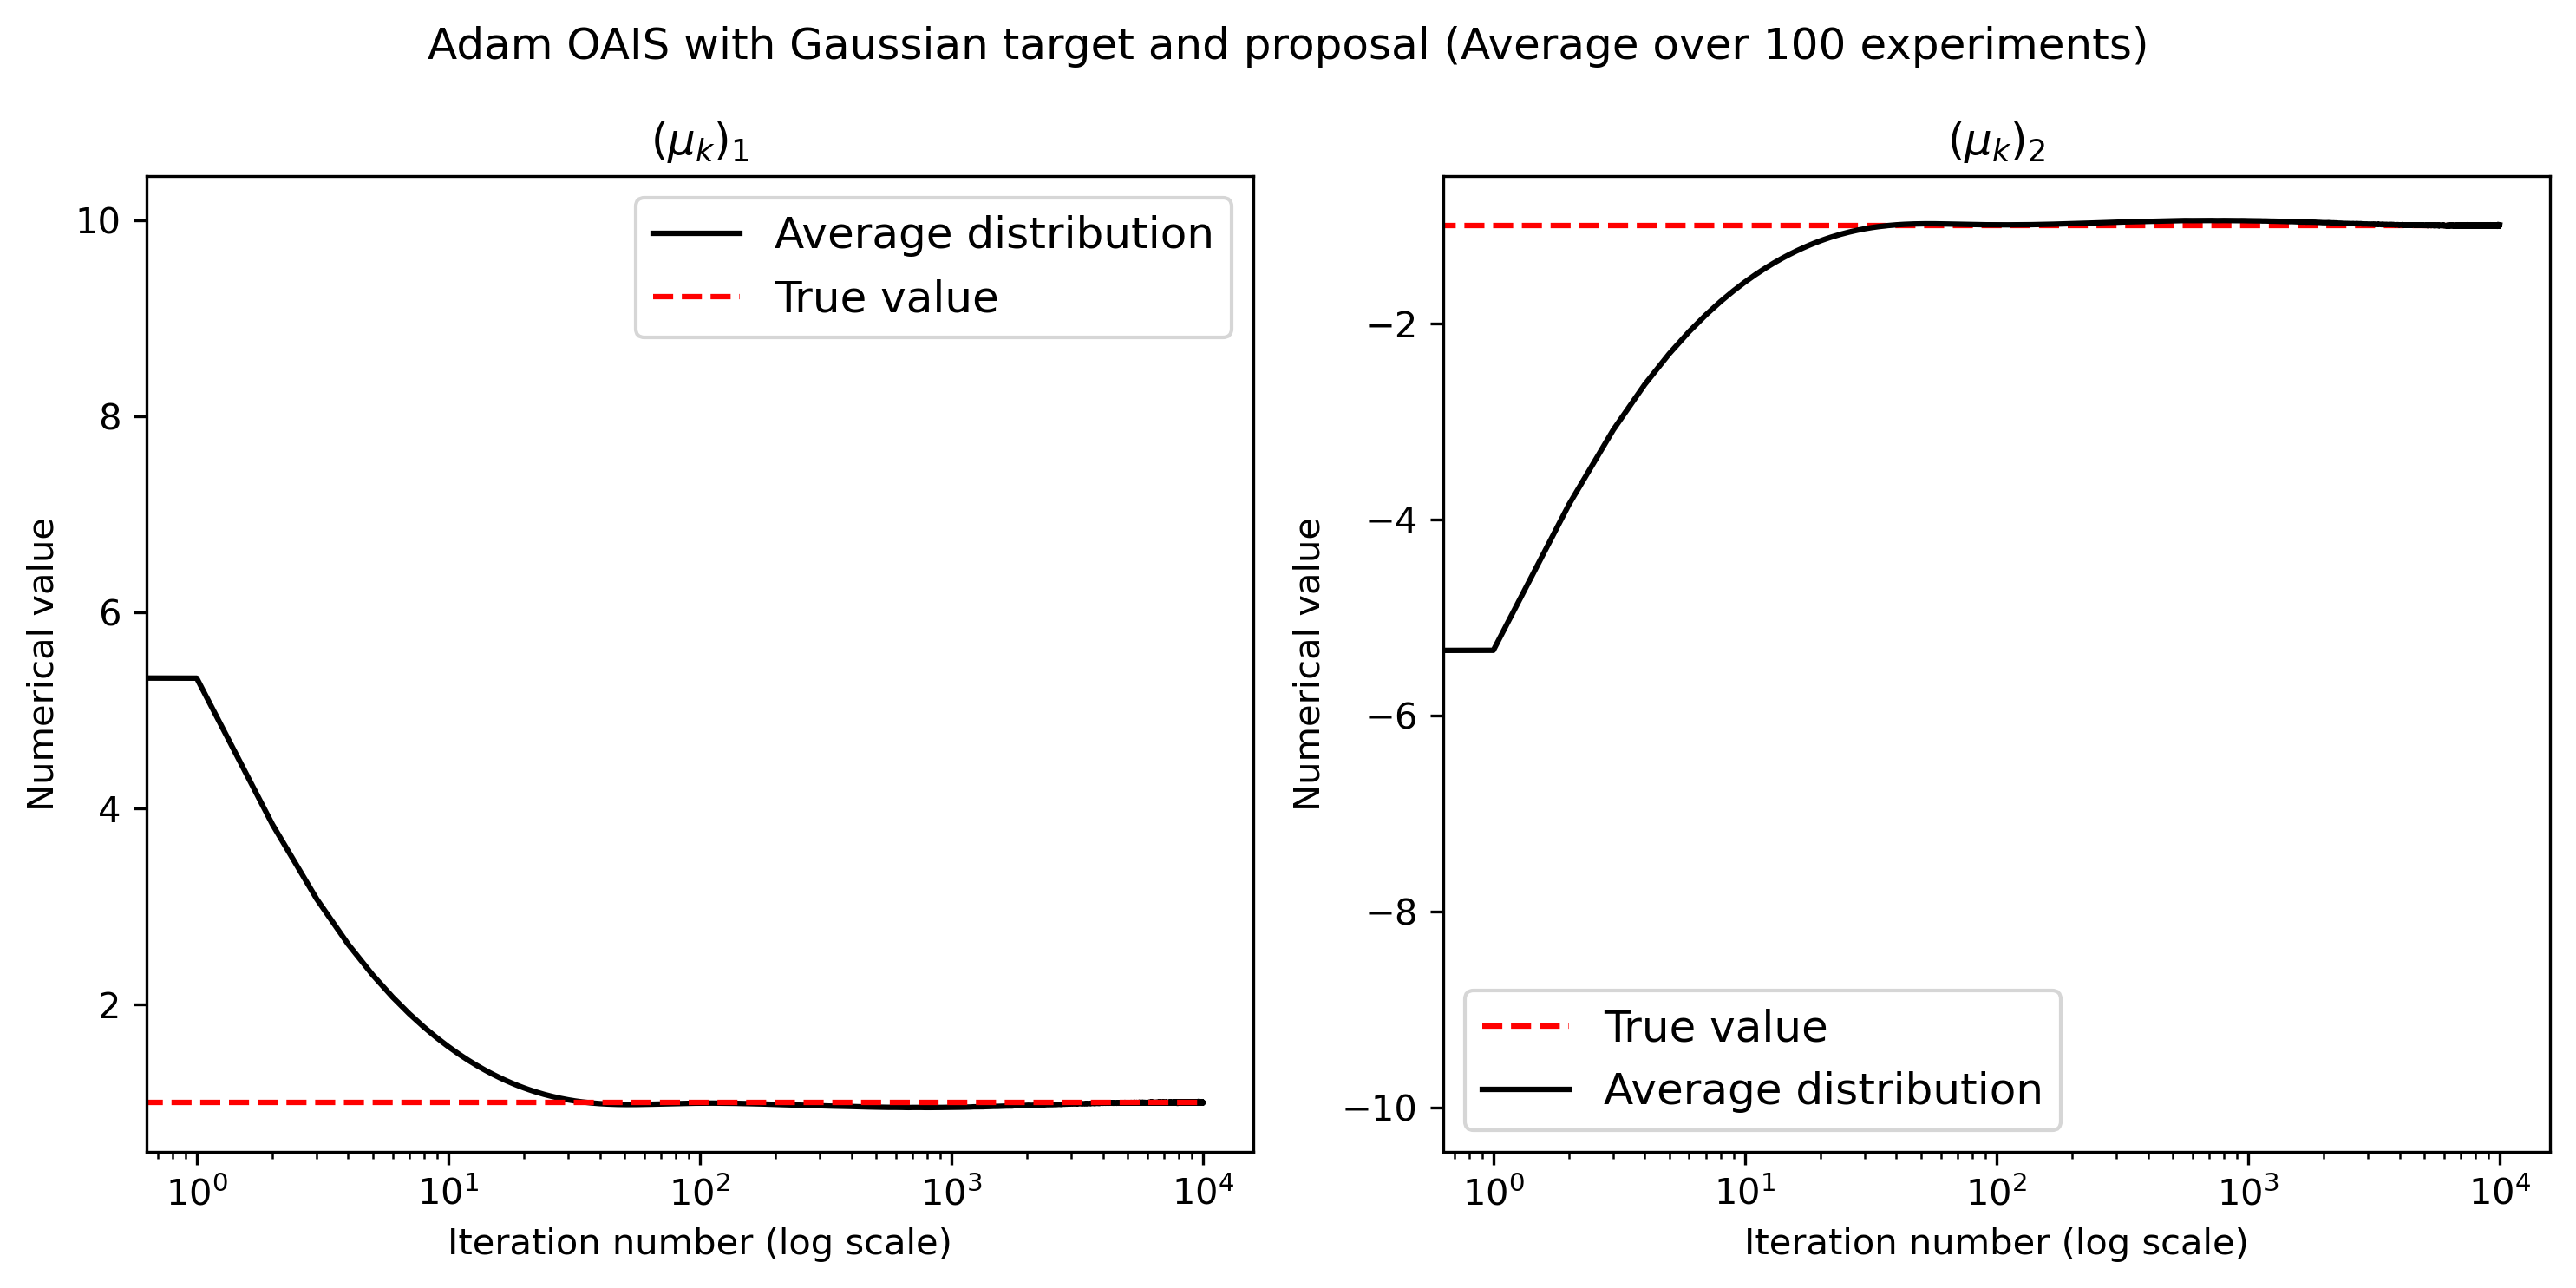

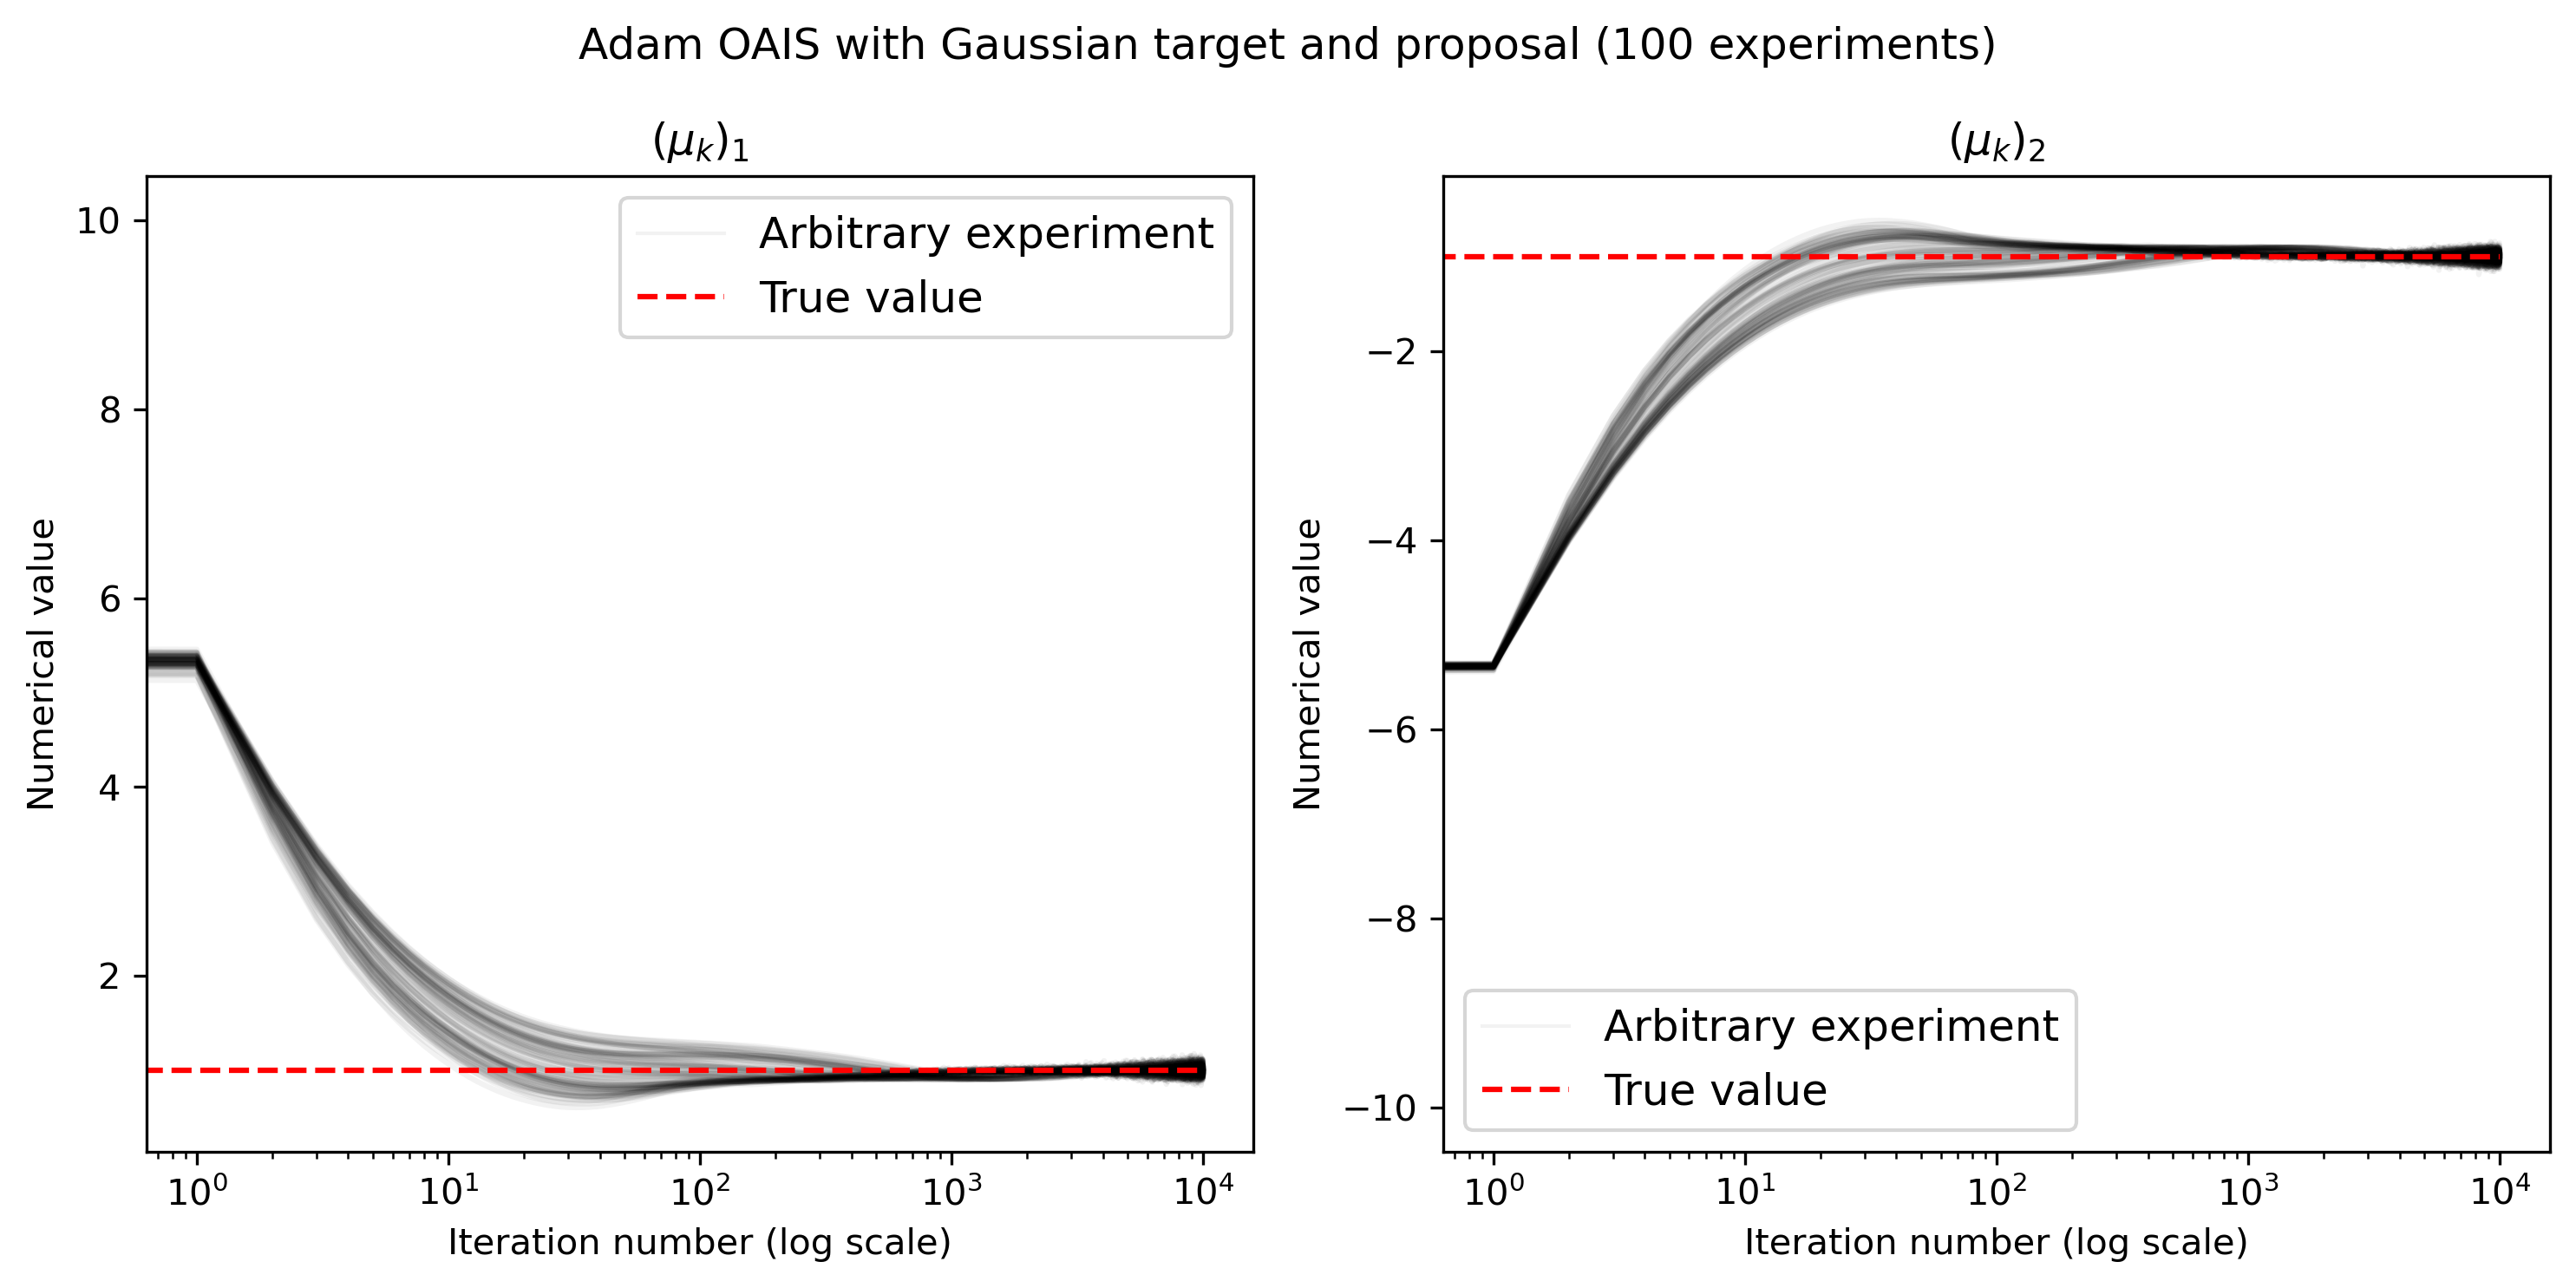

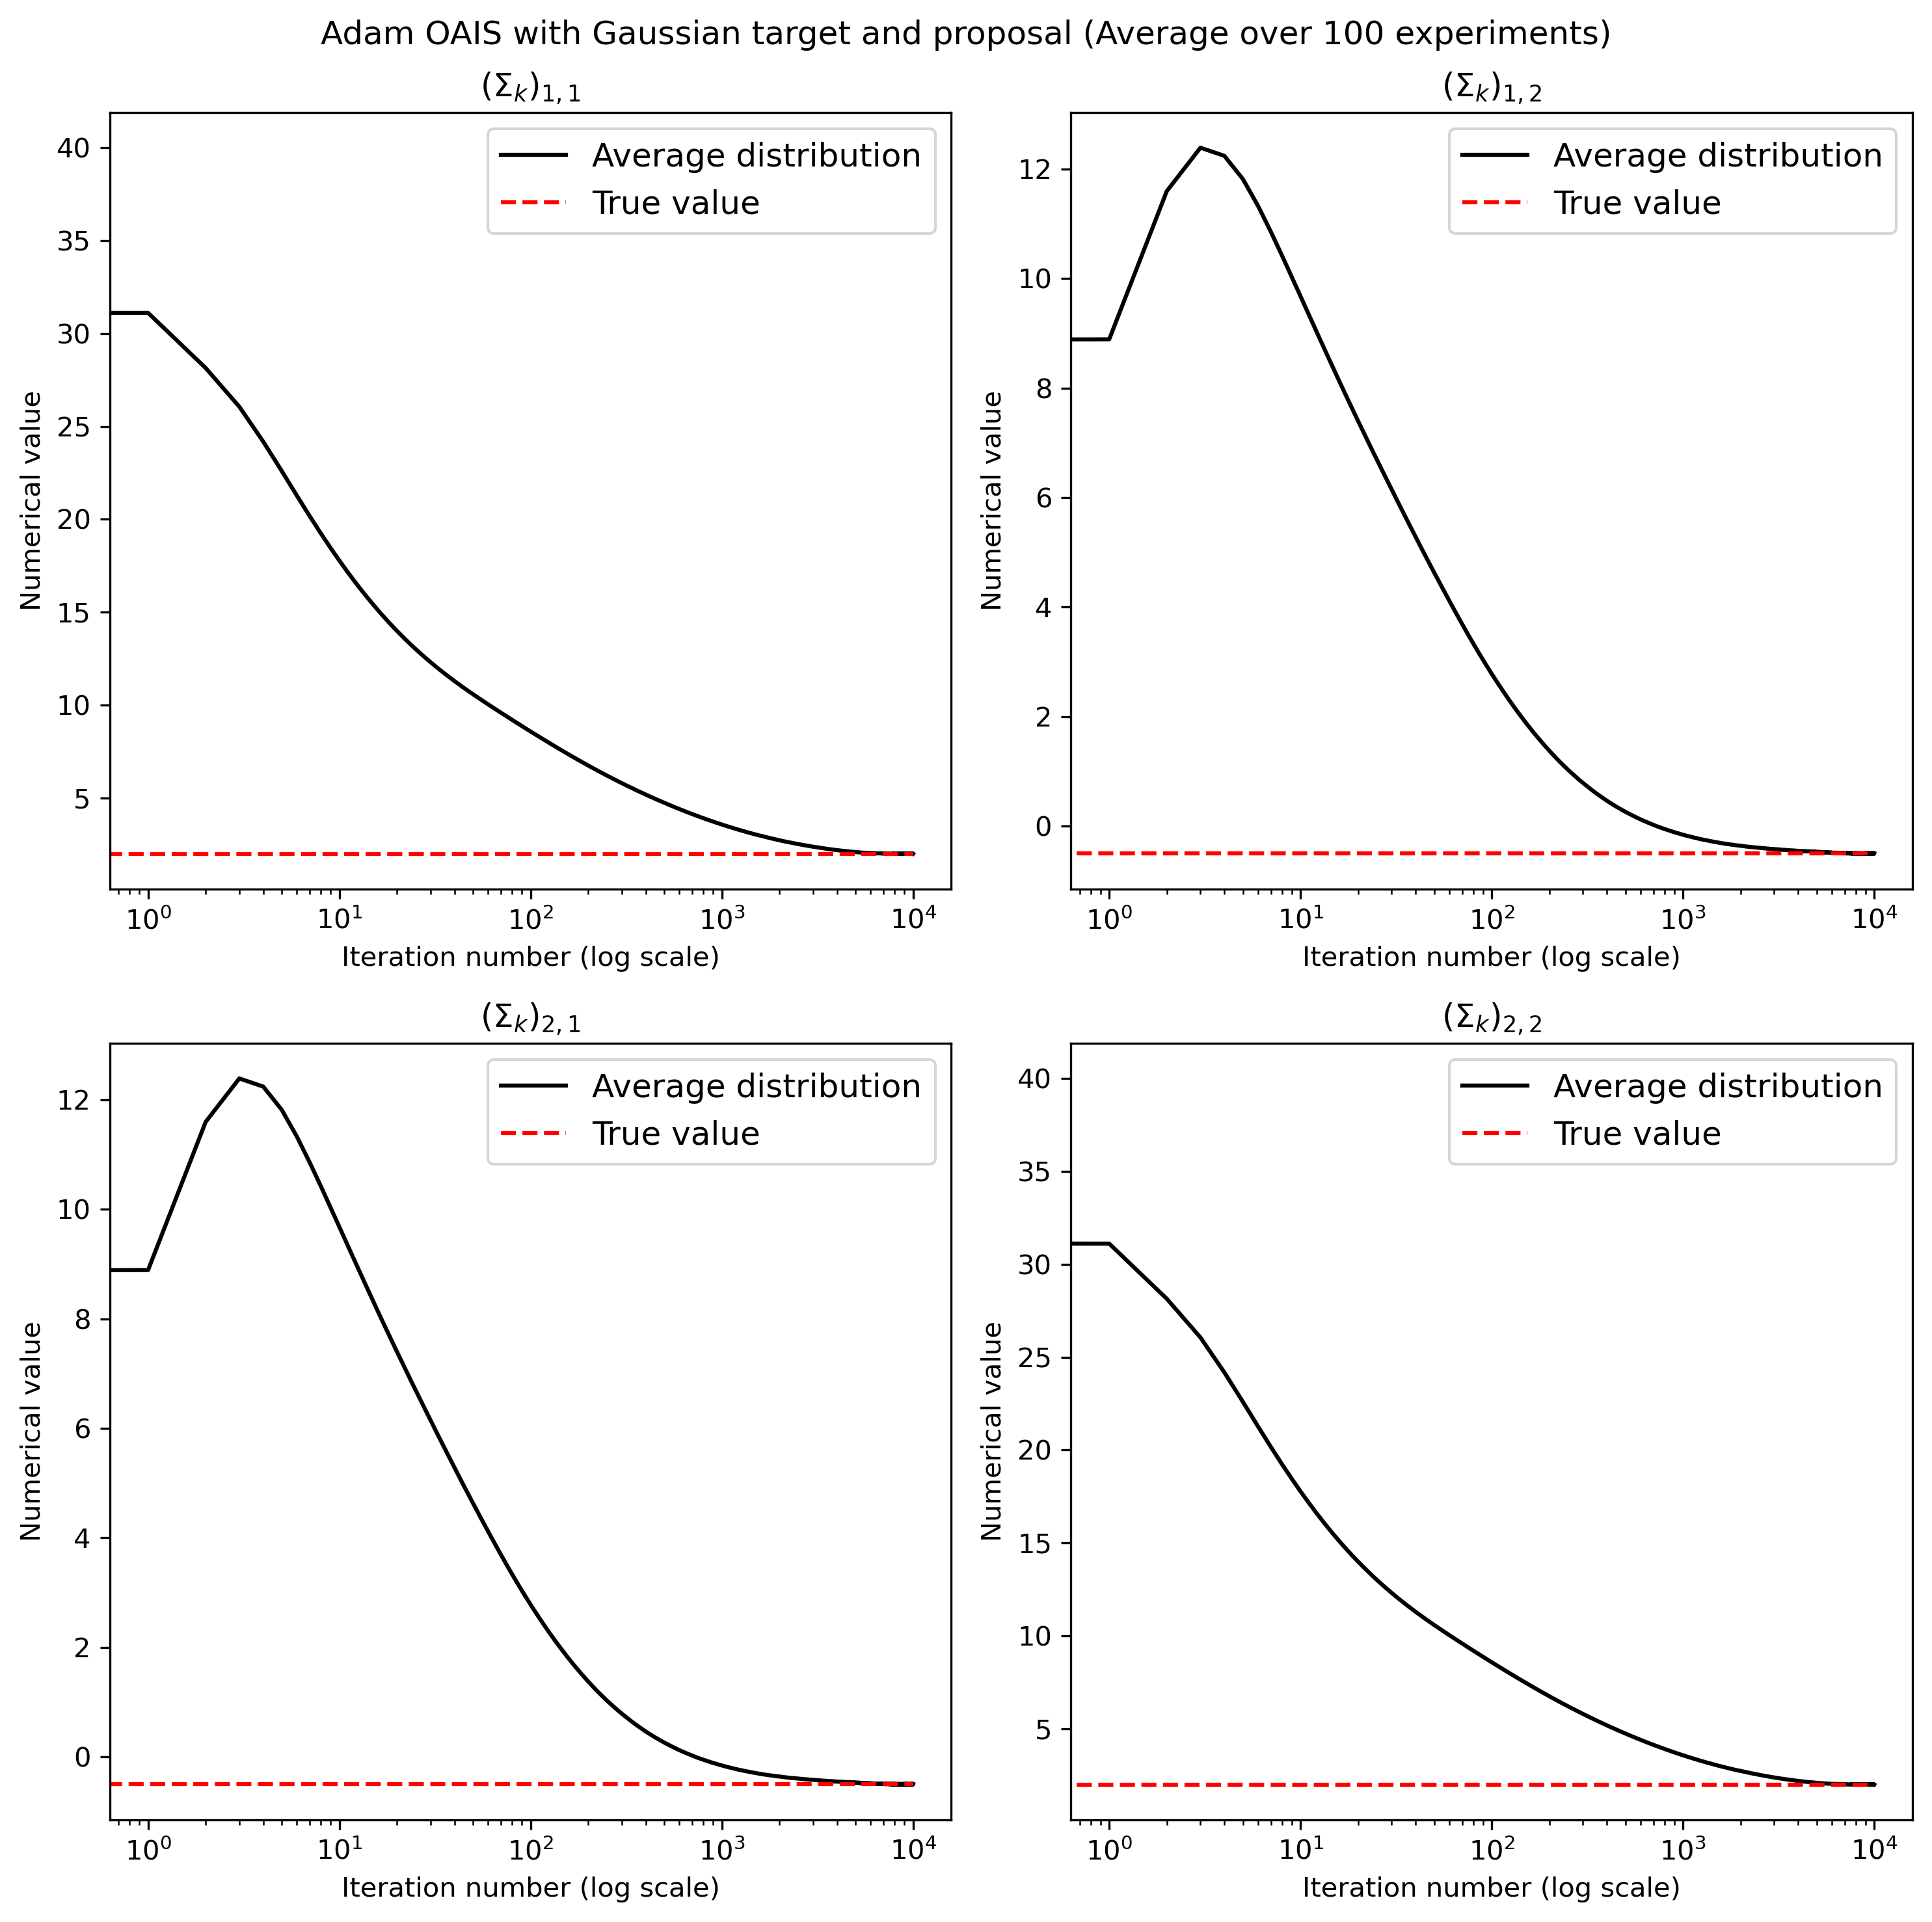

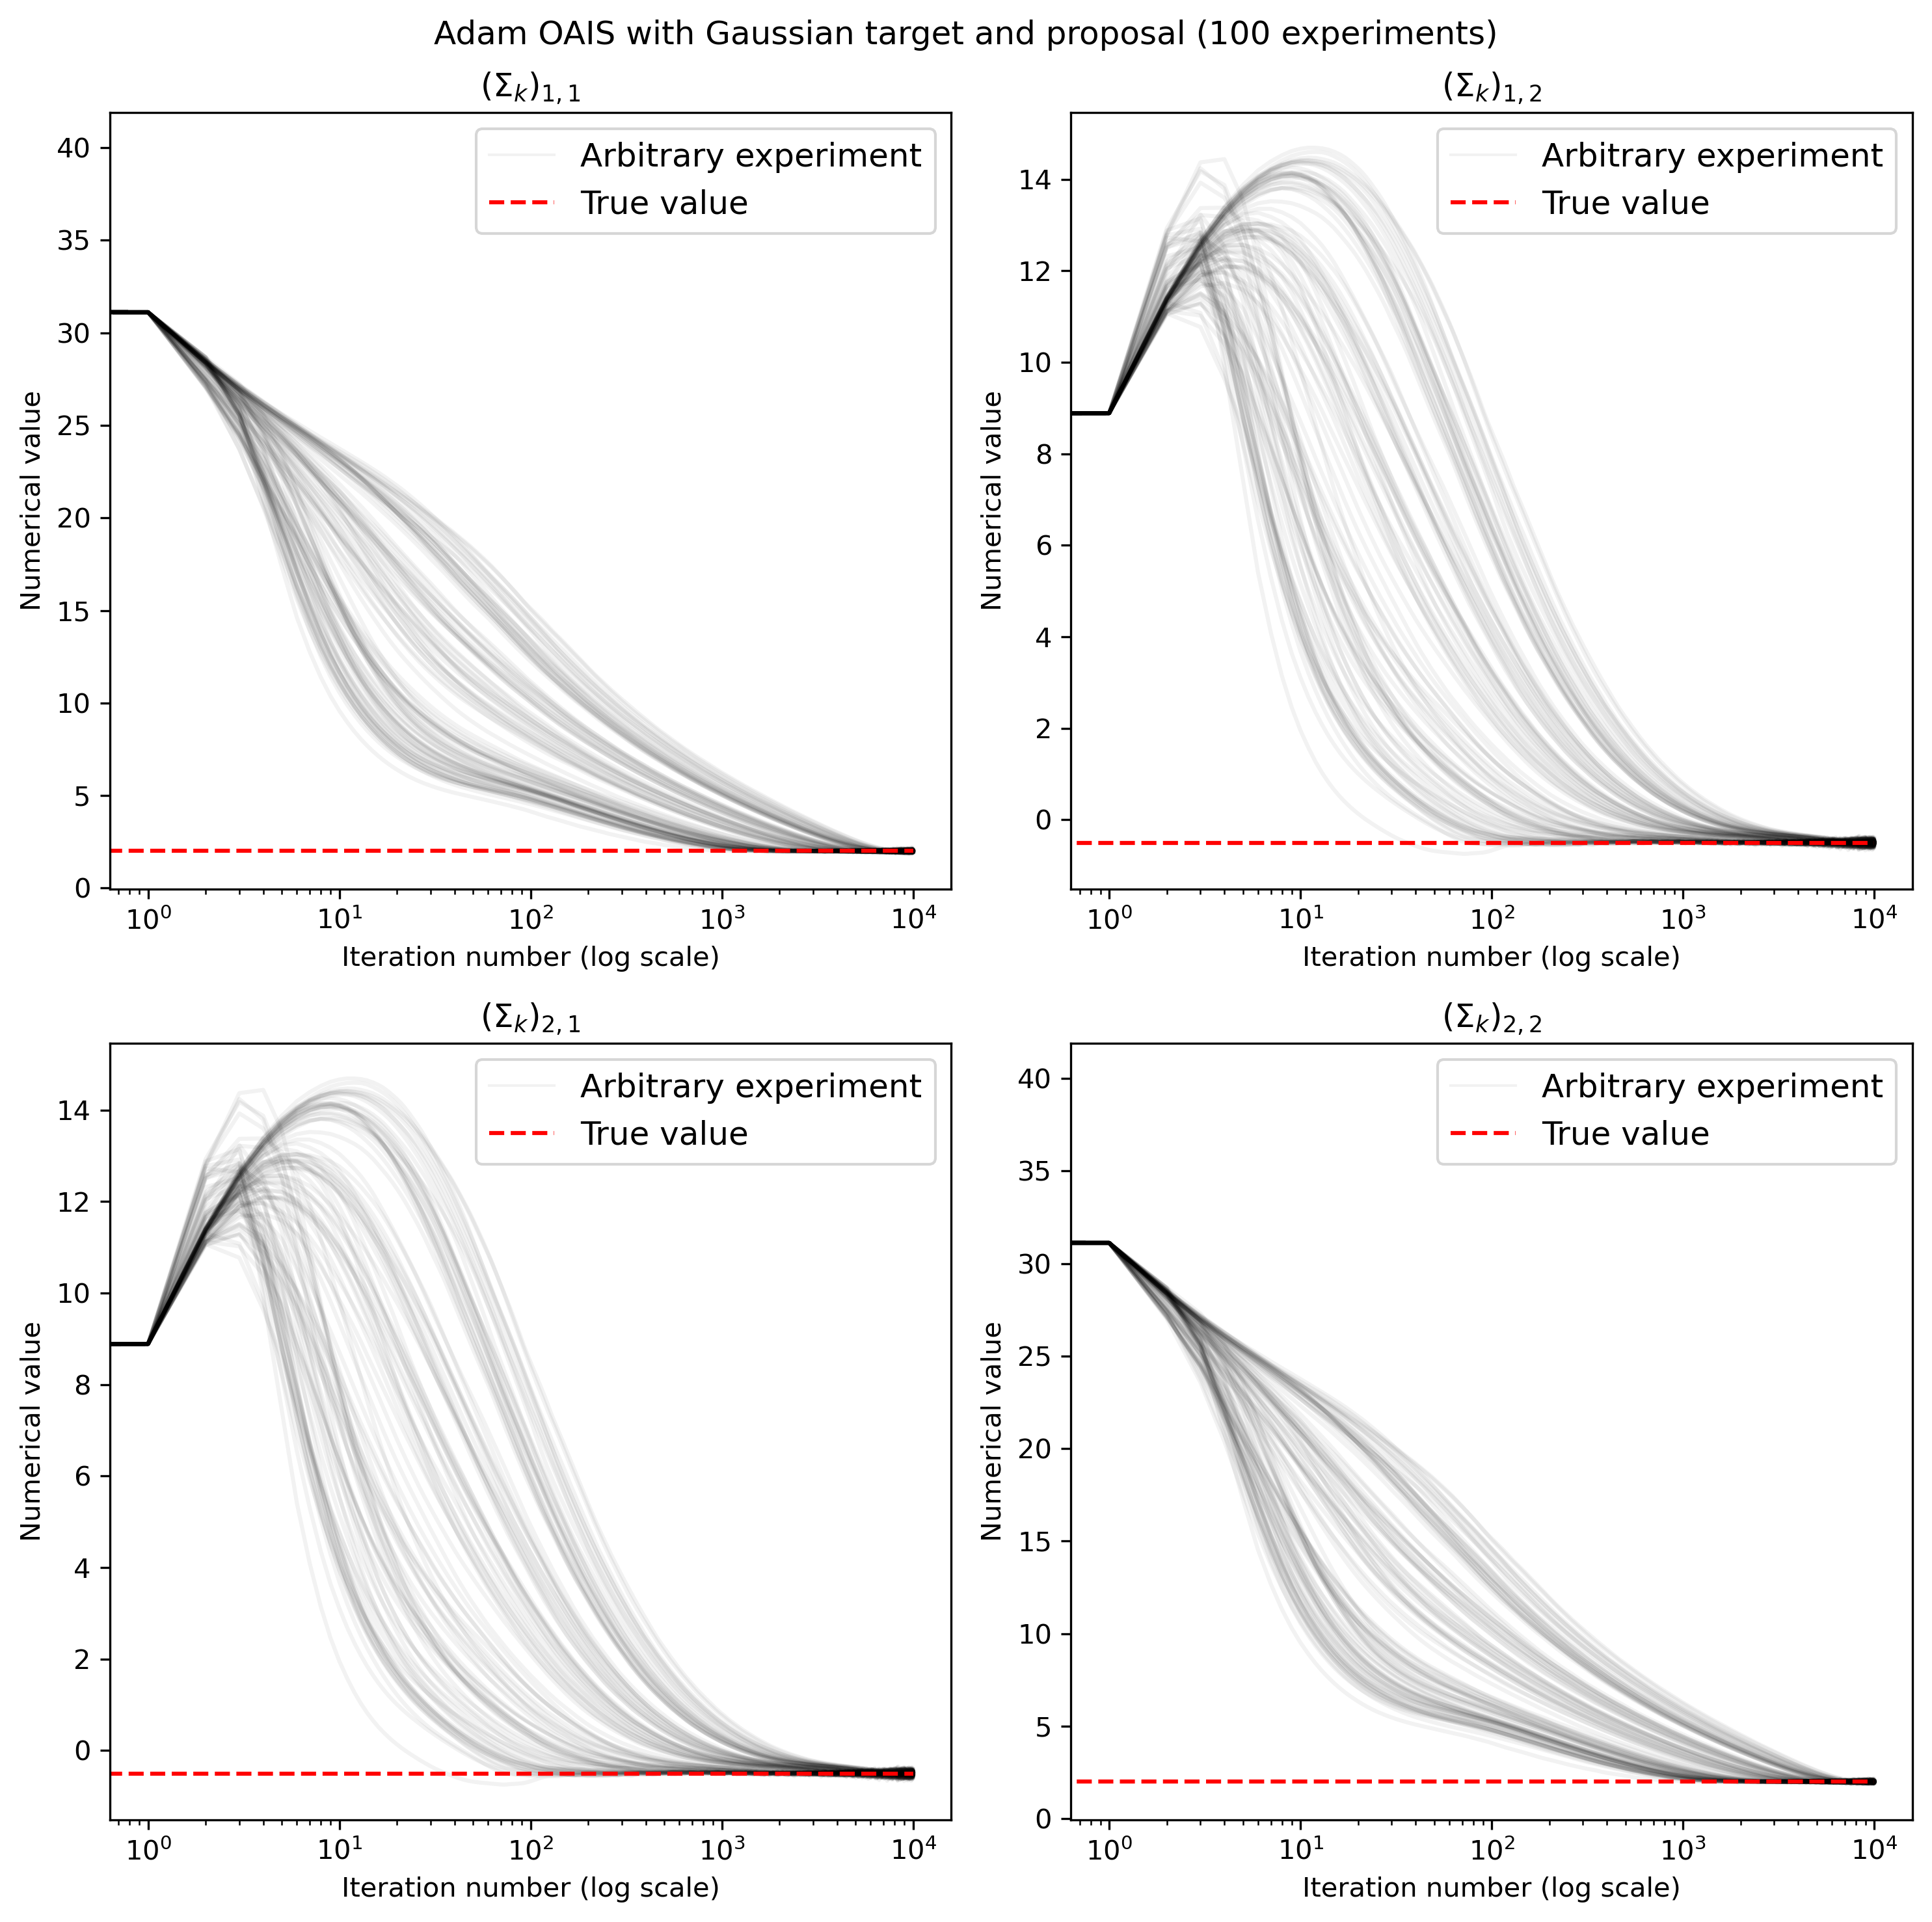

In [3]:
optimiser = "Adam"
for kind in ["mean", "cov"]:
    for average in [True, False]:
        if average:
            title = f"{optimiser} OAIS with Gaussian target and proposal (Average over {nexperiments} experiments)"
        else:
            title = f"{optimiser} OAIS with Gaussian target and proposal ({nexperiments} experiments)"
        plotter(distribution_array_Adam, pi, title=title, kind=kind, average=average, mix=False, alpha=0.05)
        plt.savefig(f"/Users/carlosperello/Desktop/M3R/figs/gaussians/{optimiser}/{optimiser}_{kind}_avg_{average}.png")


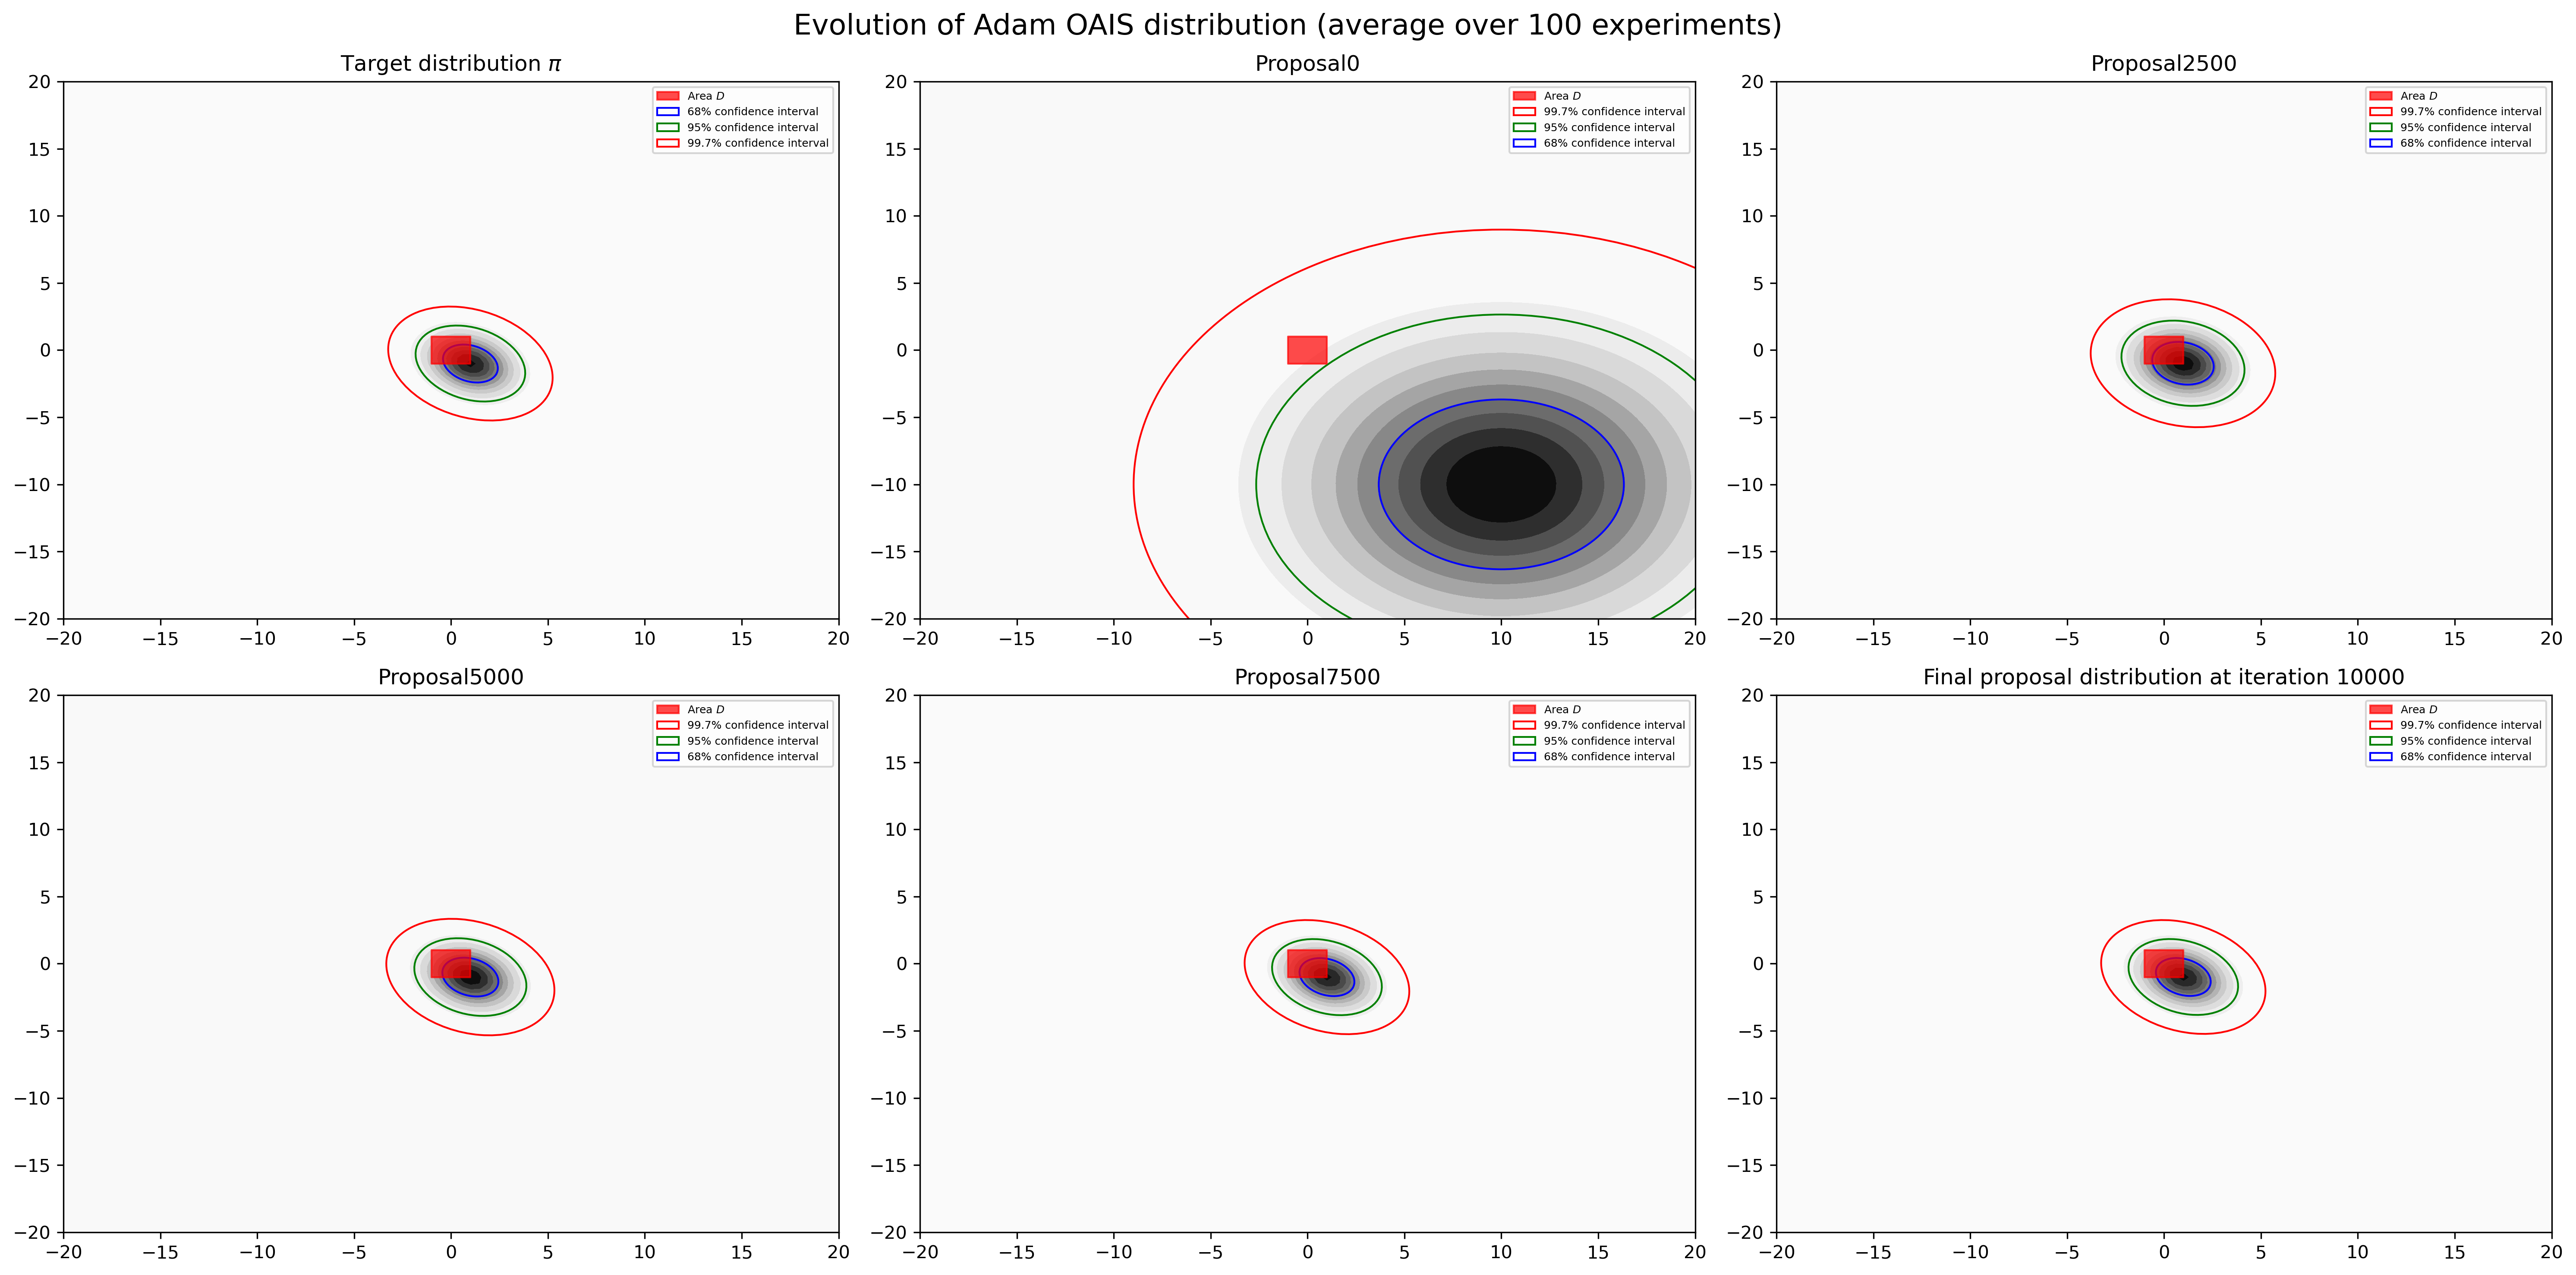

In [5]:
plot_contours(distribution_array_Adam, pi, title=f"Evolution of {optimiser} OAIS distribution (average over {nexperiments} experiments)", mix=False)
plt.savefig(f"/Users/carlosperello/Desktop/M3R/figs/gaussians/{optimiser}/{optimiser}_contours.png")

In [6]:
np.array(results_array_Adam)[0,-2]

0.24379089928085654

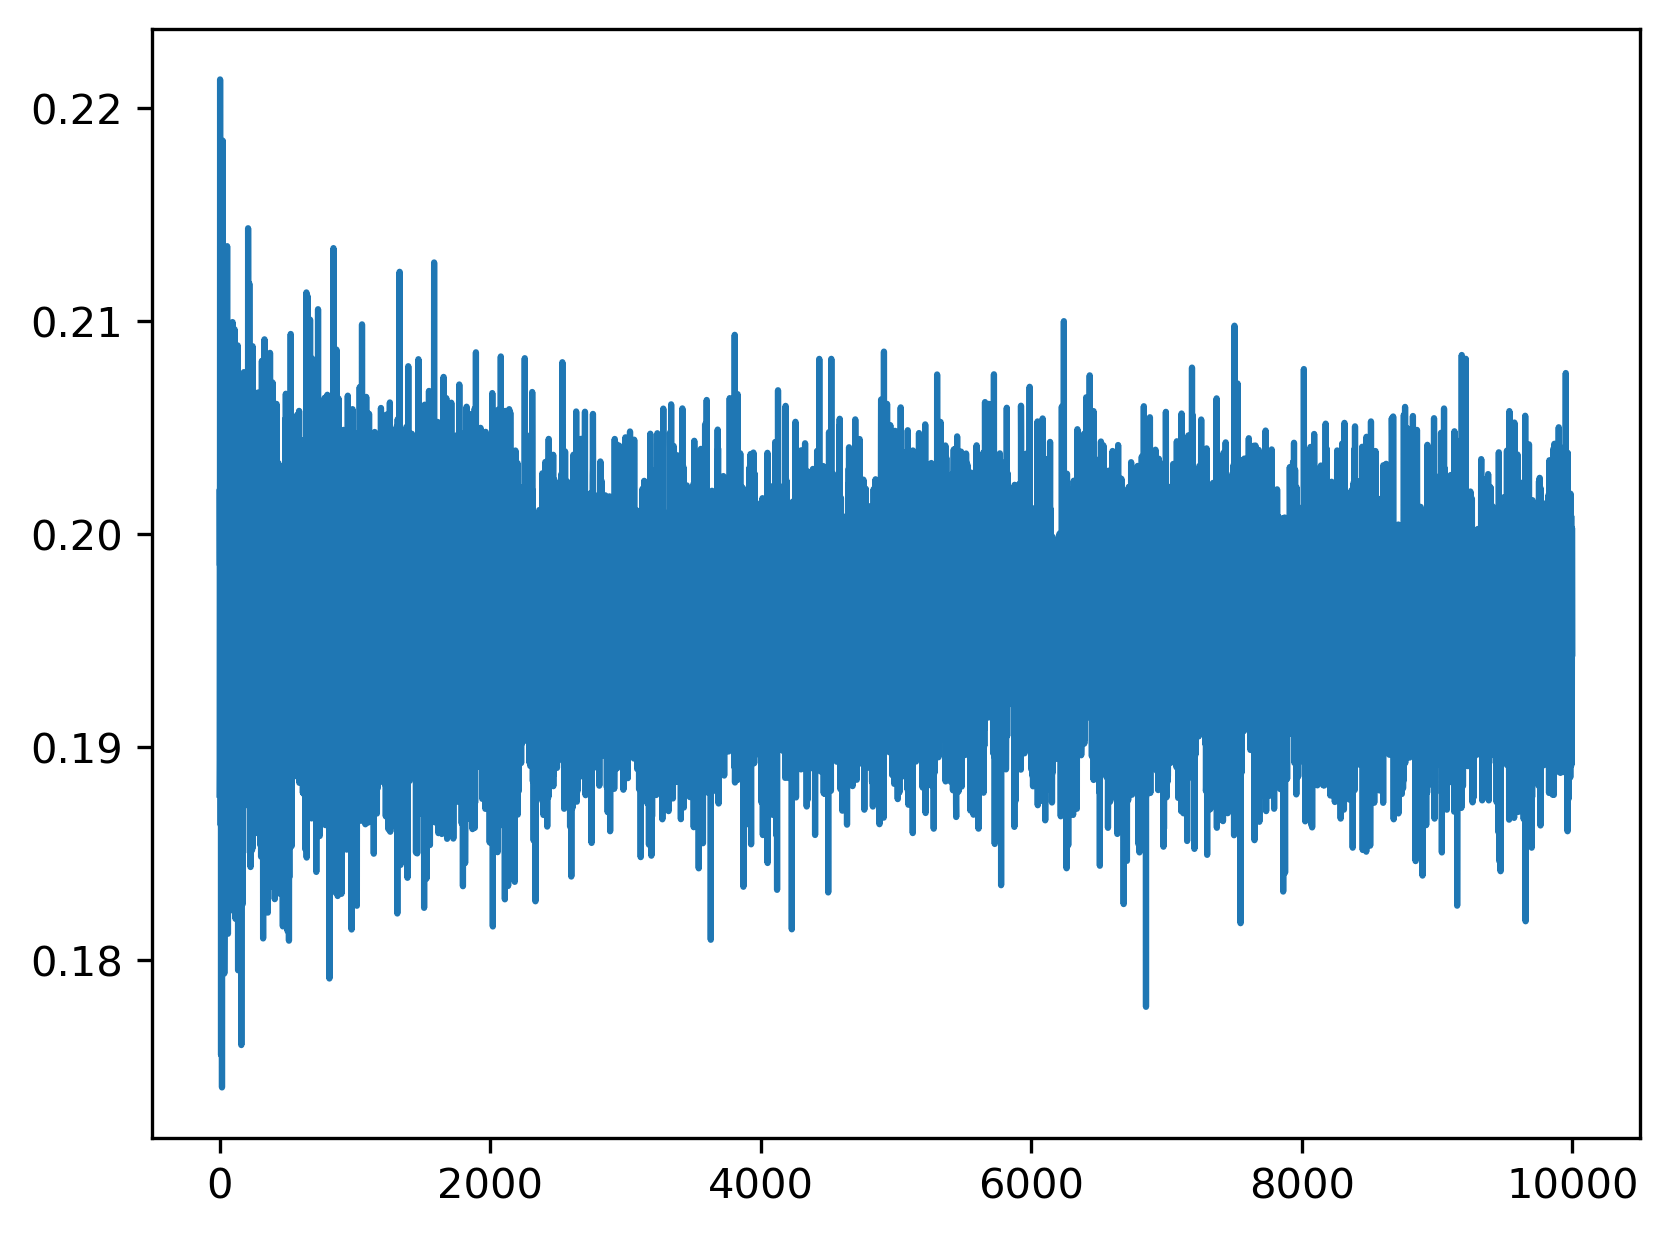

In [47]:
plt.plot(np.mean(np.array(results_array_Adam),axis=0))

In [52]:
rho_arr = [[rho(pi, d, 100) for d in distributions] for distributions in tqdm(distribution_array_Adam)]
    

100%|██████████| 100/100 [04:28<00:00,  2.68s/it]


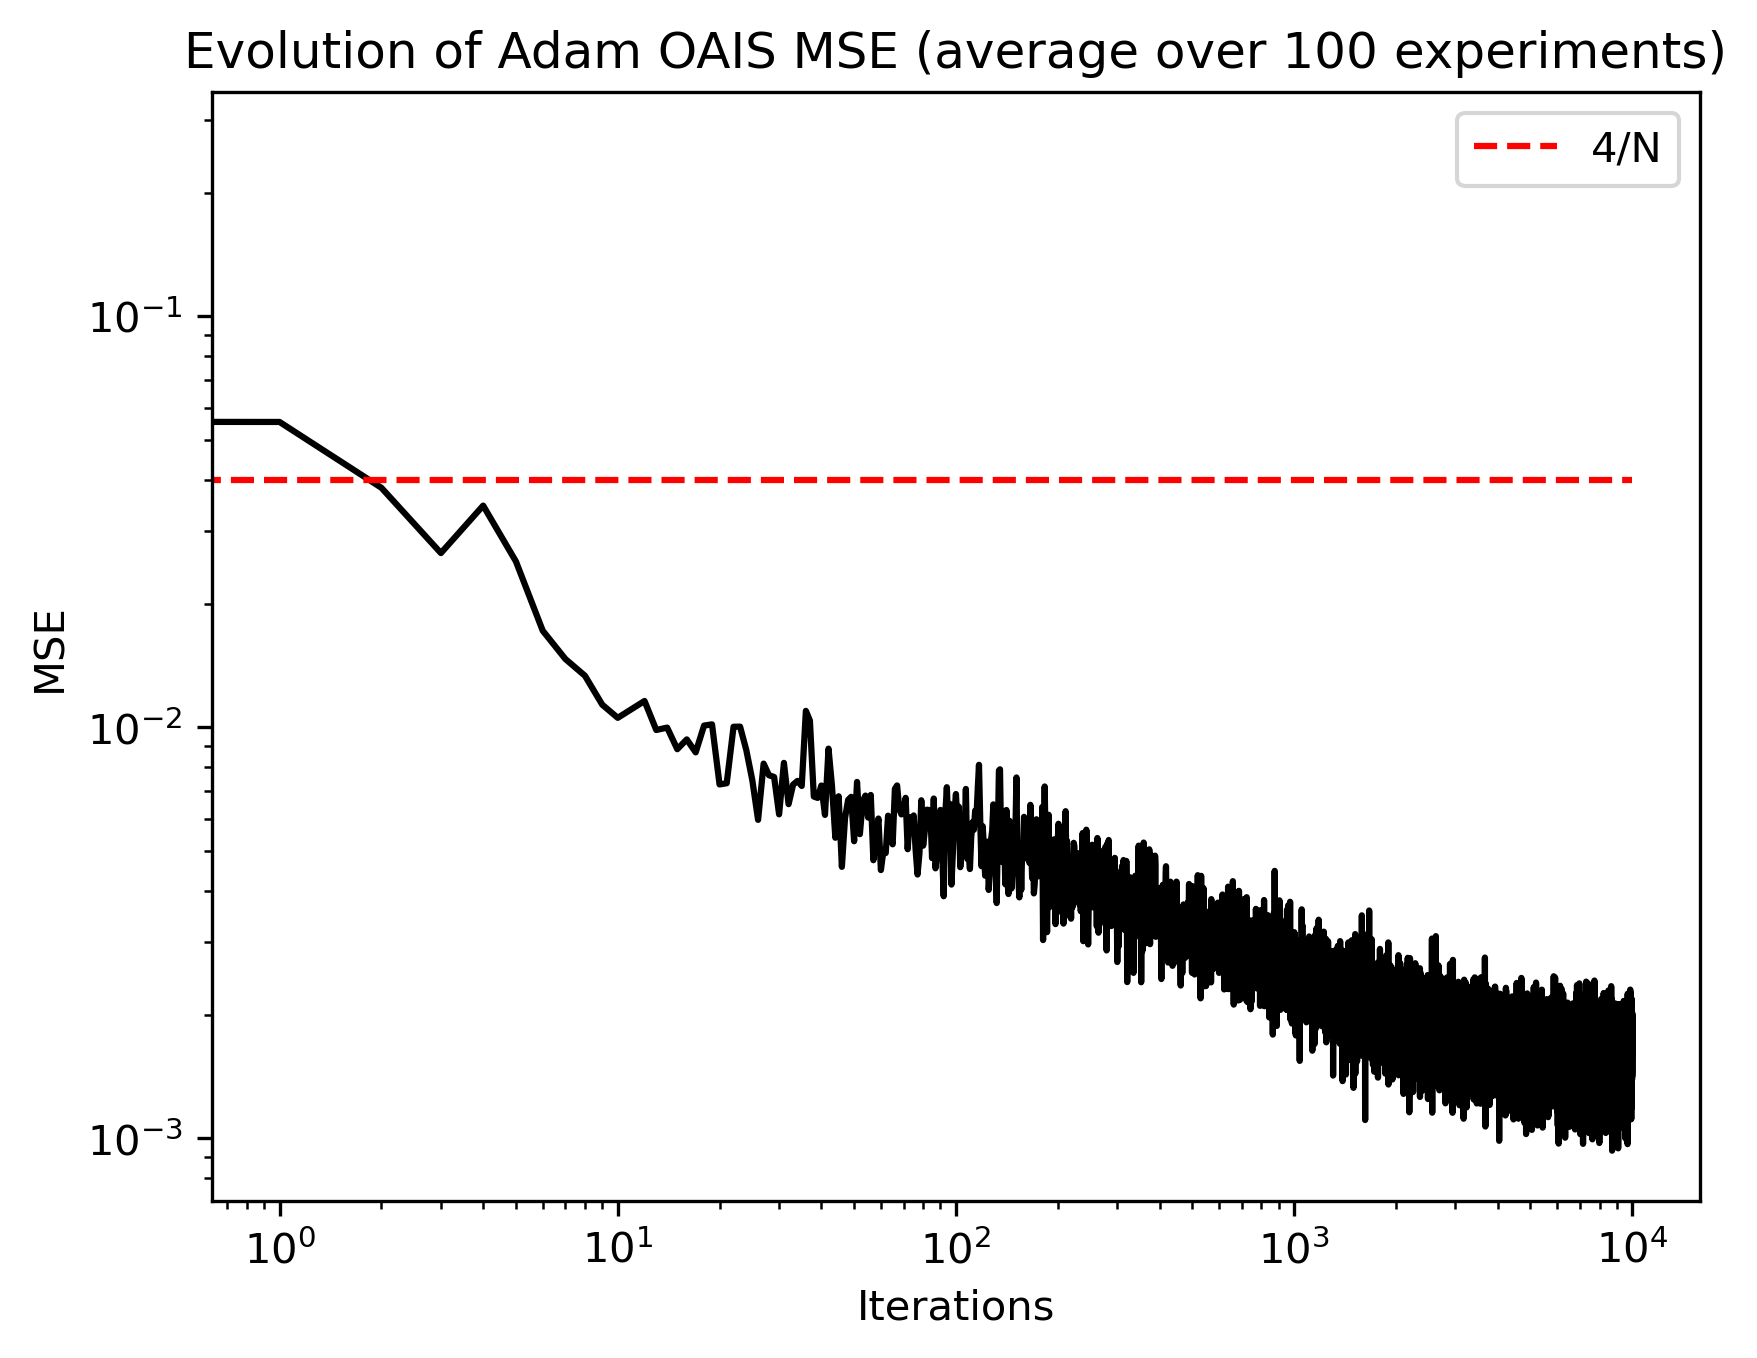

In [51]:
err_arr = (np.array(results_array_Adam) - GT)**2
plt.plot(np.mean(err_arr, axis=0), color="black")
plt.hlines(4/N, 0, Niter, color="red", label="4/N", linestyle="dashed")
plt.title(f"Evolution of {optimiser} OAIS MSE (average over {nexperiments} experiments)")
plt.yscale("log")
plt.xlabel("Iterations")
plt.xscale("log")
plt.ylabel("MSE")
plt.legend()
plt.show()

